# Supervised Machine Learning

*Author : maxime.savary@orange.com (v1.0 December 2020)*

![ML Unsup Schema](./images/ML-Introduction-001.PNG)

In Supervised Learning, starting from a labelized example set, we are looking to build a Model $F$ such as : 

$$F(X) = Y$$

with $X$: Input Datas and $Y$: Output Datas

Machine Learning Algorithms learn from *Labelized data set* allowing to identify their properties

Problems can be grouped as :
* **Regression** : The Output $Y$ is a real value (price). Algo. = Least Squares, Gradient Descent
* **Classification** : The Output $Y$ is a discrete value $(0, 1, 2)$. Algo = Logistic Regression, SVM, Naive Bayes, Decision Tree, ... 

## Regression

> We follow here the d'Andrew NG course notation (in reference)

We will use this "classic" method in order to introduce the formulation of an optimization problem and to explain the concepts implemented in the field of Machine Learning (ML).

The objective here is to find a linear function allowing to model the behavior of a multidimensional variable.

We have a dataset $\{x^{( i)},y^{( i)}\}$  and we look for a linear function

$$
h_{\theta}(x) = \theta ^{T} X =\theta _{0}x_{0} +\theta _{1}x_{1} +...+ \theta _{n} x_{n}
$$ 

verifying $$h_{\theta}(x^{(i)})=y^{(i)}$$

with

$$
x^{( i)} \ =\begin{pmatrix}
x^{( i)}_{0}\\
x^{( i)}_{1}\\
...\\
x^{( i)}_{n}
\end{pmatrix}
$$

For example, we want to find a model allowing to calculate the price of a house according to its surface, number of rooms and number of floors

|  | Surface $X_{1}$| Nb Room $X_{2}$|Nb Floor $X_{3}$|Price $Y$|
|:------|:------:|-------:|-------:|-------:|
| $x^{(1)}$    | 200     | 4     |2      |400 000      |
| $x^{(2)}$    | 240     | 4     |1      |380 000      |
| ....    |      |      |      |      |
| $x^{(m)}$    | 120     | 3     |2      |320 000      |


We put by convention : $x^{( i)}_{0}=1$

The calculation of $\theta =( \theta _{0} ,\ ...,\theta _{n})$ is done by implementing two fundamental notions of ML which are :
* The **Cost Function**
* The **Gradient Descent**


## Cost Function

The ML cost function is what will measure the error between the set of values calculated by the model and the expected values.

In regression we will express it by leaning on the formalization of the "least squares" method : https://en.wikipedia.org/wiki/Least_squares

So we have a Cost Funtion $J$ such as :

$$J( \theta ) =\frac{1}{2m}\sum ^{m}_{i=1}( h_{\theta}\left( x^{( i)}) -y^{( i)}\right)^{2} \qquad \qquad (1.1)$$

Or in Matrix notation :

$$J( \theta ) =\frac{1}{2m}( X\theta -Y)^{T}( X\theta -Y)$$

$\left( x^{( i)} ,y^{( i)}\right)$ being the "training set" and $x_{0} =( 1,\ ...\ ,1)^{T}$

Finding the best model is therefore finding the best parameters $( \theta _{0} ,\ ...,\theta _{n})$ minimizing $J$.


For this we will use the **gradient descent** which is a classical optimization method more efficient than the standard method of least squares especially in the case where we have a large-dimensional space of variables (input) and if we have many examples in the **training set**. Moreover, this method is more general because it can be applied for other formulations of the cost function (other standards, $h$ nonlinear)


## Gradient Descent

We therefore seek to obtain :

$$\underset{\theta }{min} \ J( \theta ) \ =\ \underset{\theta _{0} ,\ ...\ ,\theta _{n} \ }{min} J( \theta _{0} ,\ ...,\ \theta _{n})$$

We will apply the "Gradient Descent" method (https://en.wikipedia.org/wiki/Gradient_descent). This will consist in finding the optimum for $\theta$ while going down along the curve $J$

We have to calculate

$$\nabla J( \theta ) \ =\left(\frac{\partial }{\partial \theta _{0}} J( \theta ) ,\ ...\ ,\frac{\partial }{\partial \theta _{n}} J( \theta )\right)$$ 

which for $(1.1)$ gives 

$$\frac{\partial }{\partial \theta_{j}} J(\theta )=\sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$

In the linear case $J(\theta)$ is a convex function, so the minimum is unique. We are sure to find the best $\theta$. This is not the case for a non-convex cost function (nonlinear case => cost function associated with neural networks)

![image](./images/ML-regression-001.PNG)


**Gradient Descent Algorithm** :

1. Choose $\alpha$ the descent step (*Attention if to small => slow, if to big => we go from one side of the valley to the other without reaching the village ...*)
2. Choose $\theta = (\theta_{0},\theta_{1}, ... ,\theta_{n})$ arbitrary (*we can do this because the function $J(\theta)$ is convex i.e. only has one "valley"*)
3. Calculation of the gradient and descent in the slope ($-\nabla J(\theta)$). Simultaneous calculation for 
$$\theta_{j}\leftarrow\theta_{j} - \alpha \frac{\partial }{\partial \theta_{j}} J(\theta )$$ so, $$\theta_{j}\leftarrow\theta_{j}-\alpha\frac{1}{m} \sum_{i=1}^m(h_{\theta}(x^{(i)})-y^{(i)})x_j^{(i)}$$
4. We repeat step 2 until convergence : $\nabla J(\theta) \leq \epsilon$


**Optimization** :

We see that regarding the cost function derivative, the gradient descent algorithm is sensitive to the distribution scale of variable $X$ datas. If one of the $x_ {k}$ training set components spans over a large scale, there is a risk of slow convergence (jump from one valley to another ...)

It is to avoid this that we generally standardize data $x^{( i)}$ in order to reduce their scale while keeping their distribution

So for the Training Set $\{x^{( i)},y^{( i)}\}$, we do

$$x^{(i)} := \frac{x^{(i)} - \bar{x}}{\sigma } $$

> Standardization cannot be used systematically. It all depends on what the data represents. For example an age is a value which in one sample cannot be reduced to another dimension


## Examples

### Linear Regression with Python

We use the Library https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html in order to make a calculation model by linear regression. The data represents the prices of houses according to their surfaces

We are looking for the variable $\theta=(\theta_{0},\theta_{1})$

$$h(x)=\theta_{0}+\theta_{1}x$$

the Cost Function :

$$J(\theta_{0},\theta_{1})=\frac{1}{2}\sum_{i=1}^m(\theta_{0}+\theta_{1}x^{(i)}-y^{(i)})^{2}$$


**Script** :
* Loading of file [houseprice.csv](./datas/apibb-ML-introduction/houseprice.csv)
* Linear Model creation and graph of `list_pred` the list of predicted values 



    squaref  nbrooms   price
0      2104        3  399900
1      1600        3  329900
2      2400        3  369000
3      1416        2  232000
4      2040        4  314900
5      3137        3  579900
6      1811        4  285900
7      1437        3  249900
8      4215        4  549000
9      2162        4  287000
10     1664        2  368500
11     2238        3  329900
12     2567        4  314000
13     1200        3  299000
14      852        2  179900
15     1852        4  299900
16     6000        5  635000
17     6500        5  640000
18     7000        5  660000
19     8000        5  710000




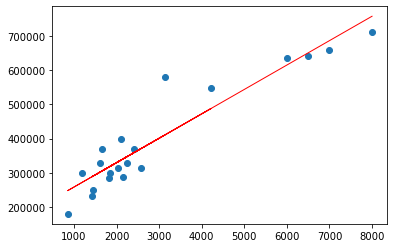

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression


data = pd.read_csv('./datas/apibb-ML-introduction/houseprice.csv')
print(data)
print("\n")

x = data['squaref'].values
y = data['price'].values


x = x.reshape(x.size, 1)
y = y.reshape(y.size, 1)


model = LinearRegression(fit_intercept=True)
model.fit(x, y)

list_pred = model.predict(x)

plt.scatter(x, y)
plt.plot(x, list_pred, color='red', linewidth=1)


plt.show()

### Gradient Descent with Python

Here we modelize the same thing as in the previous example (House price as a function of Surface area) on a larger data set. This time we apply the Gradient Descent method to normalized surfaces

**Script** :
* Loading Data in a Dataframe [data_grd_houses.csv](./datas/apibb-ML-introduction/data_grd_houses.csv)
* Normalize Surfaces
* Execute Gradient Descent ($800$ iterations with a step of $0.01$)
* Graph of Cost Function $J$
* Animated Graph presenting the linear function (model) calculated at each iteration $h(x)=\theta_{0}+\theta_{1}x$

> *Animation => Commented in Script. Seems to not Run in Notebook. So we just graph the final linear function ...*

Gradient Descent: 544718.88, 224945.15


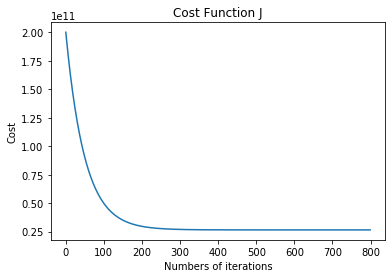

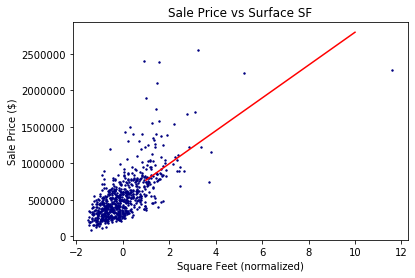

In [3]:
import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


'''
    Read Values
'''
data = pd.read_csv('./datas/apibb-ML-introduction/data_grd_houses.csv')

# Read House Data : Sqfeet + Price
x = data['sqft_living']
y = data['price']

'''
    Normalize x for optimization
'''
x = (x - x.mean()) / x.std()
x = np.c_[np.ones(x.shape[0]), x]


'''
    GRADIENT DESCENT
'''
alpha = 0.01  # Step size
epochs = 800  # No. of iterations
m = y.size  # No. of data points
theta = np.random.rand(2)  # Generate random value for Theta
all_costs = [] # Costs History
all_thetas = [theta] # Thetas History

for i in range(epochs):
    error = np.dot(x, theta) - y
    cost = 1 / (2 * m) * np.dot(error.T, error)
    all_costs.append(cost)
    theta = theta - (alpha * (1 / m) * np.dot(x.T, error))
    all_thetas.append(theta)



# Pass the relevant variables to the function and get the new values back...
last_theta_calucalted = all_thetas[-1]

# Print the results...
print("Gradient Descent: {:.2f}, {:.2f}".format(last_theta_calucalted[0], last_theta_calucalted[1]))


# Plot the cost function history
fig1 = plt.figure(1)
plt.title('Cost Function J')
plt.xlabel('Numbers of iterations')
plt.ylabel('Cost')
plt.plot(all_costs)
plt.show()

#Set the plot up,
fig2 = plt.figure(1)
plt.title('Sale Price vs Surface SF')
plt.xlabel('Square Feet (normalized)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='navy',s=2)
x_line = np.linspace(1, 10, 1000)
y_line = all_thetas[-1][1] * x_line + all_thetas[-1][0]
plt.plot(x_line, y_line, color='red')

'''
# Plot Points and predicted function calculated for each step

fig2, ax2 = plt.subplots()

# Create animation
x_line = np.linspace(1, 10, 1000)
line, = ax2.plot([], [], 'r', label = 'Gradient descent', lw = 1.5)

ax2.scatter(x[:,1], y, color='navy',s=2)

def init_anim():
    line.set_data([], [])
    return line


def animate(i):
    # Animate line
    line.set_data(x_line, all_thetas[i][1] * x_line + all_thetas[i][0])
    # Animate value display
    return line

anim1 = animation.FuncAnimation(fig2, animate, init_func=init_anim,
                               frames=len(all_thetas), interval=2,
                               repeat_delay=60, blit=False)
'''

plt.show()

## Case $J$ not Convex with Matlab

In the case of complex optimization problems, we often end up with a nonlinear $h$ model and a non-convex $J$ cost function comprising several local minima. In the MATLAB example below, we assume a non-convex (purely theoretical) cost function and apply the descent method starting from a local maximum. The algorithm results in a local minimum which is not necessarily the global minimum of the function $J$


> *The MATLAB Scripts cannot be executed in notebook => OCTAVE is an OpenSource implementation of MATLAB which can be downloaded here : https://www.gnu.org/software/octave/*


**Algorithm** :
* We suppose a Cost Function $J(x,y) = sin(x)^2 + cos(y)^2$
* Start from a summit $P=(1.5, -0.1)$
* Calculate $px$ and $py$ until output condition $\Vert \nabla J( px,py)\Vert ^{2} \leq \epsilon$


```matlab
[X,Y] = meshgrid(-2:0.1:2,-2:0.1:2);
Z = sin(X).^2 + cos(Y).^2;
surf(X,Y,Z)
xlabel('th0')
ylabel('th1')
zlabel('J(th0, th1)')


hold on;

px = 1.5
py = -0.1
plot3(px, py, sin(px).^2 + cos(py).^2,':r*')

%calcule descent

alpha = 0.2
epsilon = 0.001
i = 0

while i < 500    
    
    % Gradient calculate in (px, py)
    grad_px = 2*sin(px)*cos(px)
    grad_py = -2*sin(py)*cos(py)
    gn = squarenorm(grad_px, grad_py)
    if (gn <= epsilon) 
        break
    end
    px = px - alpha*(grad_px)
    py = py - alpha*(grad_py)
    % Plot
    plot3(px, py, sin(px).^2 + cos(py).^2,':r*')
    pause(1.0)
    
    i = i +1
end

hold off;



function n = squarenorm(x, y)

    n = sqrt(x.^2 + y.^2)

end
```

![image](./images/ML-graddesc-001.PNG)


